!pip install pmdarima-1.7.1-cp37-cp37m-win_amd64.whl
!pip install pmdarima

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

# !pip3 install pyramid-arima


# Import Data


In [4]:
df = pd.read_csv(r"C:\Users\komal\Downloads\AirPassengers.csv")
df

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


<Axes: xlabel='date'>

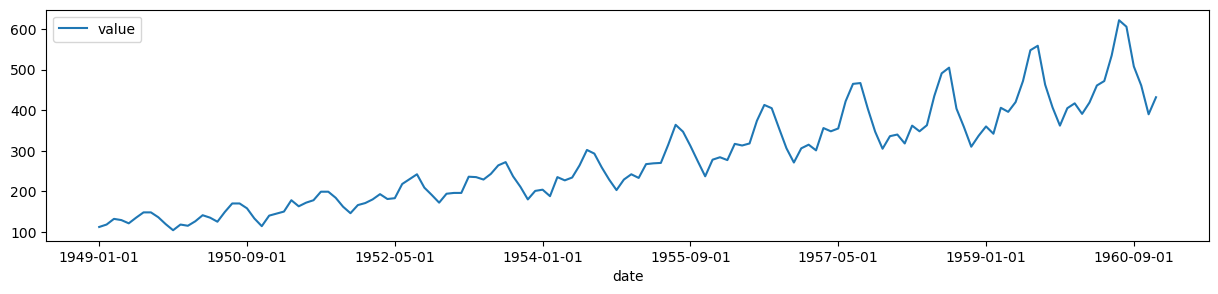

In [5]:
df.plot.line(x = 'date',y = 'value',figsize=(15,3))

* As per above pattern -- it is non-stationary

# Stationary  -- ADF Test 

* H0 : - The data is  non-stationary
* H1 : - The data is  stationary

* Alpha = 0.05 


In [9]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['value'])
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64

* We do not Reject Ho,So data is  non-stationary

# Differencing  ( d )

In [12]:
df['diff_1'] = df['value'].diff()  # 1st order
df['diff_2'] = df['diff_1'].diff() # 2nd order
df

,date,value,diff_1,diff_2
0,1949-01-01,112,NaN,NaN
1,1949-02-01,118,6.0,NaN
2,1949-03-01,132,14.0,8.0
3,1949-04-01,129,-3.0,-17.0
4,1949-05-01,121,-8.0,-5.0
...,...,...,...,...
139,1960-08-01,606,-16.0,-103.0
140,1960-09-01,508,-98.0,-82.0
141,1960-10-01,461,-47.0,51.0
142,1960-11-01,390,-71.0,-24.0


In [13]:
import numpy as np
np.round(np.var(df.iloc[:,1:]))  # d = 1

value     14292.0
diff_1     1131.0
diff_2     1577.0
dtype: float64

In [14]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(df.diff_1.loc[1:,])
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Observations of Dickey-fuller test


Test Statistic                  -2.829267
p-value                          0.054213
#lags used                      12.000000
number of observations used    130.000000
dtype: float64

<Axes: xlabel='date'>

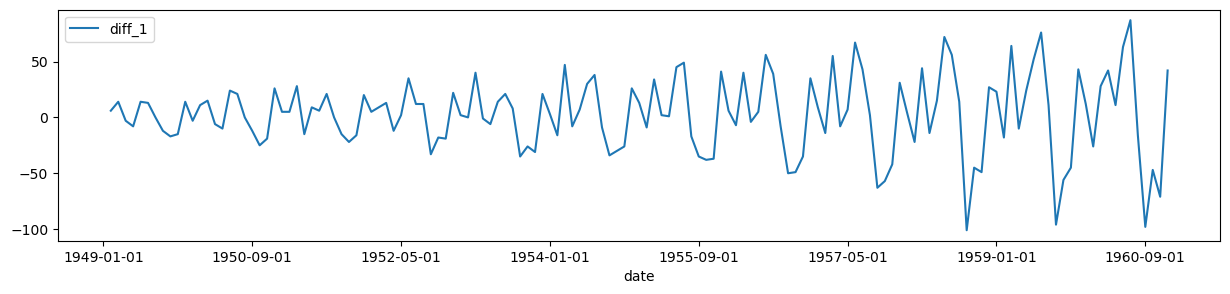

In [15]:
df.plot.line(x = 'date',y = 'diff_1',figsize=(15,3))

* We Reject Ho, So we can say data is stationary

# ACF & PACF Plot

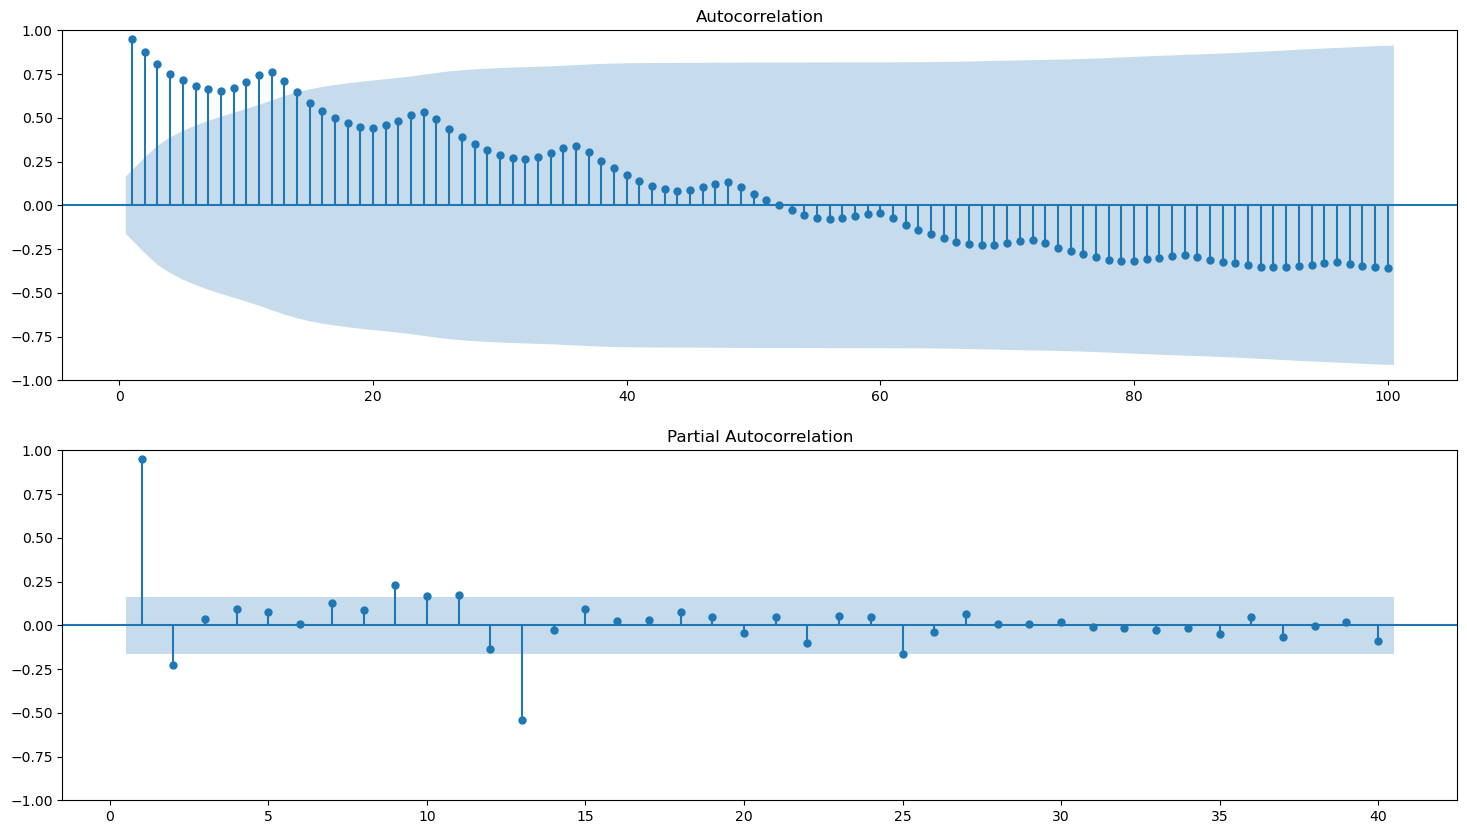

In [18]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))
plot_acf(df['value'],lags=100, ax=ax[0],zero=False)  # q = 0
plot_pacf(df['value'],lags=40, ax=ax[1],zero=False)  # p = 2
plt.show()

* Order (p,d,q) = (0,1,2)

# ARIMA MODEL - Manual 

from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = ARIMA(df.value,
                      start_p=0,max_p=3, # Pacf(p) = 0,1,2,3
                      d=0,max_d=2,       # Difference (d) = 0,1,2
                      start_q=0,max_q=3, # acf (q) = 0,1,2,3
                      m=12,              # frequency of series
                      seasonal=False,    # No Seasonality  then below P,D,Q will not be used 
                      start_P=0,max_P=2,
                      D=0,max_D=1,
                      start_Q=0,max_Q=2,
                      test='adf',       # use adftest to find optimal 'd'
                      trace=True)

# ARIMA MODEL -- Auto ( Grid Search )

In [29]:
pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   --------------------------------------- 625.1/625.1 kB 11.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 23.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(df.value,
                      start_p=0,max_p=3, # Pacf(p) = 0,1,2,3
                      d=0,max_d=2,       # Difference (d) = 0,1,2
                      start_q=0,max_q=3, # acf (q) = 0,1,2,3
                      m=12,              # frequency of series
                      seasonal=False,    # No Seasonality  then below P,D,Q will not be used 
                      test='adf',       # use adftest to find optimal 'd'
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2057.847, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1412.973, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1410.569, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1417.450, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1411.319, Time=0.18 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1411.135, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1413.093, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1408.249, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1409.748, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1413.639, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1408.287, T

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -699.125
Date:                Tue, 18 Mar 2025   AIC                           1408.249
Time:                        10:51:37   BIC                           1423.098
Sample:                             0   HQIC                          1414.283
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.6007     12.051      1.627      0.104      -4.018      43.219
ar.L1          0.4990      0.131      3.822      0.000       0.243       0.755
ar.L2          0.4314      0.124      3.466      0.001       0.187       0.675
ma.L1          0.8565      0.081     10.540      0.000       0.697       1.016
sigma2       942.2482    107.314      8.780      0.000     731.916    1152.580
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 0.89
Prob(Q):                              0.63   Prob(JB):                         0.64
Heteroskedasticity (H):               6.30   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Fitted Value

In [ ]:
import numpy as np
df['Forecast'] = np.round(model.predict_in_sample(),0)
df.iloc[:,[0,1,4]]

# Model plot

In [ ]:
# Plot
plt.plot(df.value)
plt.plot(df.Forecast, color='darkgreen')
plt.title("Actual vs Forecast fitted value")
plt.show()

# Accuracy metrics


In [ ]:
def forecast_accuracy(actual,forecast):
    mape = (np.mean(np.abs(actual-forecast)/np.abs(actual)))*100  # MAPE
    return({'MAPE':mape})

forecast_accuracy(df.value,df.Forecast)

#  Forecast - Future Month


In [ ]:
n_periods = 36
fc = model.predict(n_periods=n_periods)

index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.title("Final Forecast of WWW Usage")
plt.show()

In [ ]:
fc

# SARIMAX -- Auto ( Grid Search )

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
smodel = pm.auto_arima(df.value,
                      start_p=0,max_p=3, # Pacf(p) = 0,1,2,3 without seasonal
                      d=0,max_d=2,       # Difference (d) = 0,1,2
                      start_q=0,max_q=3, # acf (q) = 0,1,2,3
                      m=12,              # frequency of series or time
                      seasonal=True,     # Seasonality is True then below P,D,Q will be used 
                      start_P=0,max_P=2, # P= 0,1,2 Seasonal 
                      D=0,max_D=1,       # D = 0,1 Seasonal
                      start_Q=0,max_Q=2, # Q = 0,1,2 Seasonal
                      test='adf',       # use adftest to find optimal 'd'
                      trace=True)

In [ ]:
smodel.summary()

# Fitted Value

In [ ]:
df['S_Forecast'] = np.round(smodel.predict_in_sample(),0)
df.iloc[:,[0,1,5]]

# Model plot

In [ ]:
# Plot
plt.plot(df.value)
plt.plot(df.S_Forecast, color='darkgreen')
plt.title("Actual vs Forecast fitted value")
plt.show()

# Accuracy metrics


In [ ]:
def forecast_accuracy(actual,forecast):
    mape = (np.mean(np.abs(actual-forecast)/np.abs(actual)))*100  # MAPE
    return({'mape':mape})

forecast_accuracy(df.value,df.S_Forecast)

#  Forecast


In [ ]:
n_periods = 36
future_Forecast = smodel.predict(n_periods=n_periods)
future_Forecast

In [ ]:
index_of_future_Forecast = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(future_Forecast, index=index_of_future_Forecast)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.title("Forecast Next 36 Month")
plt.show()

# Finished